<a href="https://colab.research.google.com/github/domon59/ML/blob/master/Adult_Census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [173]:
df = pd.read_csv('/content/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [175]:
# from this info, no missing data can be seen. But in the table, some "?" can be found

In [176]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [177]:
df.rename(columns ={'education.num':'education_num','capital.gain':'capital_gain','marital.status':'marital_status','capital.loss':'capital_loss','hours.per.week':'hours_per_week','native.country':'native_country'}, inplace = True)

In [178]:
#replace "?" to nan
df[df=='?']=np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [179]:
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           14
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       41
income                2
dtype: int64

In [180]:
# fill missing data
for col in ['workclass','occupation','native_country']:
   df[col].fillna(df[col].mode()[0], inplace = True)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


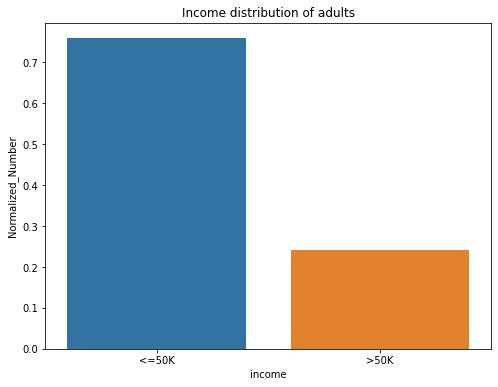

In [182]:
fig, ax = plt.subplots(figsize = (8,6))
income_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name ='Normalized_Number')
sns.barplot(x='income', y ='Normalized_Number', data = income_percentage.head(10))
ax.set_title('Income distribution of adults')
plt.show()

(array([2410., 3160., 2461., 3429., 3465., 2583., 3198., 2965., 1828.,
        2139., 1558., 1033.,  996.,  599.,  269.,  227.,  120.,   54.,
          20.,   47.]),
 array([17.  , 20.65, 24.3 , 27.95, 31.6 , 35.25, 38.9 , 42.55, 46.2 ,
        49.85, 53.5 , 57.15, 60.8 , 64.45, 68.1 , 71.75, 75.4 , 79.05,
        82.7 , 86.35, 90.  ]),
 <a list of 20 Patch objects>)

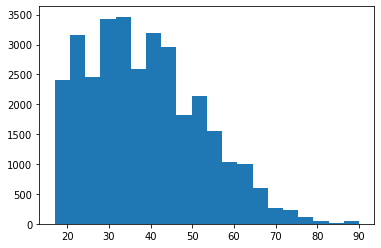

In [183]:
plt.hist(df['age'], bins = 20)

In [184]:
def age_group(x):
  if 17< x <= 30:
    return '17-30'
  if 31 < x <= 40:
    return '31-40'
  if 41< x <= 50:
    return '41-50'
  if 51 < x <= 60:
    return '51-60'
  if 61 < x <= 70:
    return '61-70'
  else:
    return 'Greater than 70'

df['age_group'] = df['age'].apply(age_group)
  


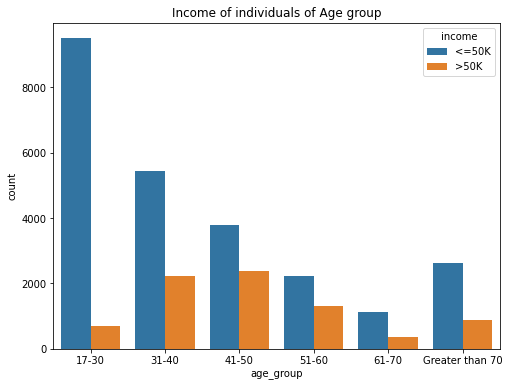

In [185]:
fig, ax = plt.subplots(figsize = (8,6))
sns.countplot(x='age_group', hue ='income', data = df, order =['17-30','31-40','41-50','51-60','61-70','Greater than 70'])
ax.set_title('Income of individuals of Age group')
plt.show()

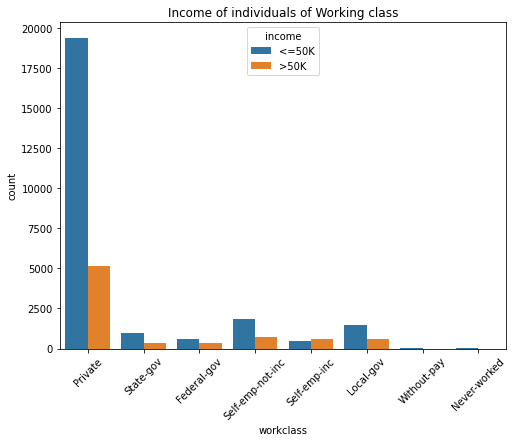

In [186]:
fig, ax = plt.subplots(figsize = (8,6))
sns.countplot(x='workclass', hue ='income', data = df) #order =['17-30','31-40','41-50','51-60','61-70','Greater than 70']
ax.set_title('Income of individuals of Working class')
plt.xticks(rotation = 45)
plt.show()

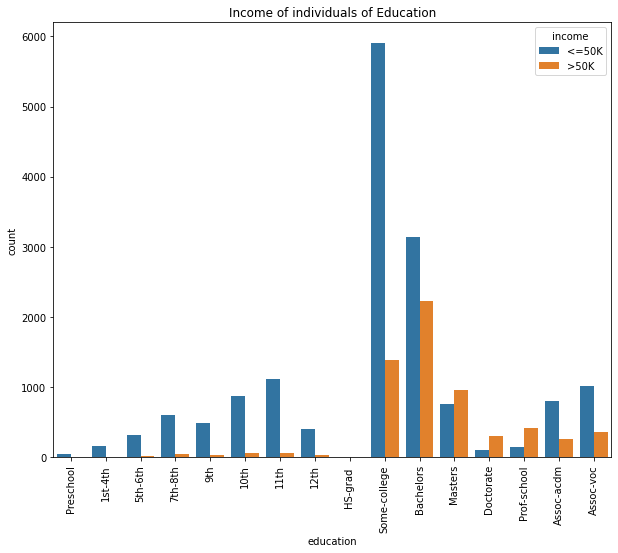

In [187]:
fig, ax = plt.subplots(figsize = (10,8))
sns.countplot(x='education', hue ='income', data = df, order =['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school','Assoc-acdm', 'Assoc-voc'])
ax.set_title('Income of individuals of Education')
plt.xticks(rotation = 90)
plt.show()

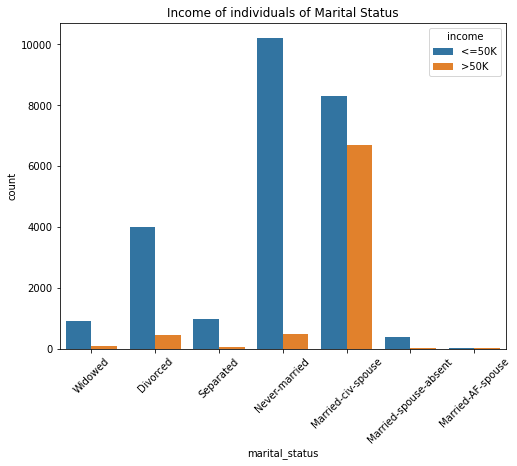

In [188]:
fig, ax = plt.subplots(figsize = (8,6))
sns.countplot(x='marital_status', hue ='income', data = df)# order =['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                #'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school','Assoc-acdm', 'Assoc-voc'])
ax.set_title('Income of individuals of Marital Status')
plt.xticks(rotation = 45)
plt.show()

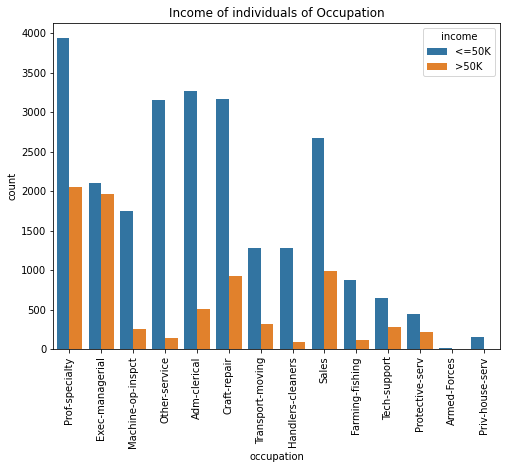

In [189]:
fig, ax = plt.subplots(figsize = (8,6))
sns.countplot(x='occupation', hue ='income', data = df)# order =['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                #'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school','Assoc-acdm', 'Assoc-voc'])
ax.set_title('Income of individuals of Occupation')
plt.xticks(rotation = 90)
plt.show()

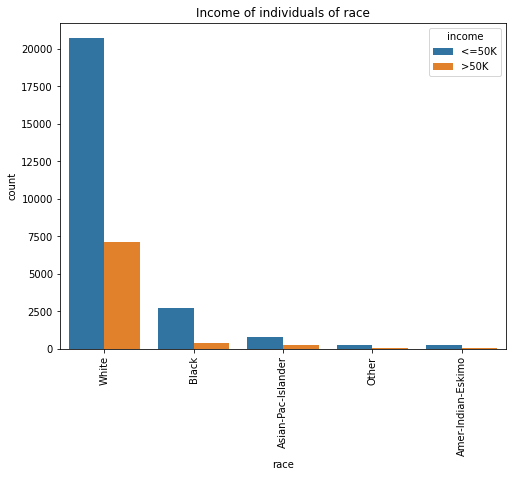

In [190]:
fig, ax = plt.subplots(figsize = (8,6))
sns.countplot(x='race', hue ='income', data = df)# order =['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                #'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school','Assoc-acdm', 'Assoc-voc'])
ax.set_title('Income of individuals of race')
plt.xticks(rotation = 90)
plt.show()

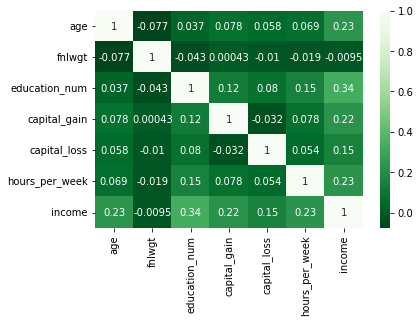

In [191]:
#Correlation 
df['income'] = df['income'].map({'<=50K':0, '>50K':1})
sns.heatmap(df.corr(), cmap ='Greens_r', annot = True)

In [192]:
corr =df.corr()
corr['income'].sort_values(ascending = False)

income            1.000000
education_num     0.335154
age               0.234037
hours_per_week    0.229689
capital_gain      0.223329
capital_loss      0.150526
fnlwgt           -0.009463
Name: income, dtype: float64

(array([   51.,   168.,   333.,   646.,   514.,   933.,  1175.,   433.,
        10501.,  7291.,  1382.,  1067.,  5355.,  1723.,   576.,   413.]),
 array([ 1.    ,  1.9375,  2.875 ,  3.8125,  4.75  ,  5.6875,  6.625 ,
         7.5625,  8.5   ,  9.4375, 10.375 , 11.3125, 12.25  , 13.1875,
        14.125 , 15.0625, 16.    ]),
 <a list of 16 Patch objects>)

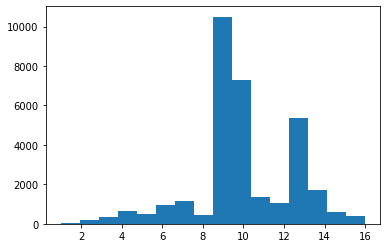

In [193]:
plt.hist(df['education_num'], bins = 16)

In [194]:
df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],'Under HighSchool', inplace= True)
df['race'].replace(['Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'], ' Minority', inplace=True)

In [195]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_group
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0,Greater than 70
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,Greater than 70
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0,61-70
3,54,Private,140359,Under HighSchool,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,51-60
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,Greater than 70


In [196]:
train_df =df.drop(['education_num', 'fnlwgt','age_group'], axis =1)

In [197]:
train_df.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,Under HighSchool,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [198]:
from sklearn.preprocessing import LabelEncoder
#select category
cate_features = ['workclass','education','marital_status','occupation','relationship','race', 'sex','native_country']
labelencoder = LabelEncoder()
#train_df['workclass'] = labelencoder.fit_transform(train_df['workclass'])
for col in cate_features:
  labelencoder.fit(train_df[col])
  train_df[col] = labelencoder.fit_transform(train_df[col])

In [199]:
#build model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [200]:
target = train_df.pop('income')

In [201]:
X_train,X_test, y_train, y_test = train_test_split(train_df, target, test_size = 0.3, random_state = 42)
print(X_train.shape, X_test.shape)

(22792, 12) (9769, 12)


In [202]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = train_df.columns)
X_train.shape

(22792, 12)

In [203]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=train_df.columns)
X_test.shape

(9769, 12)

In [204]:
#Logistic Regression model with all features

logre = LogisticRegression()
logre.fit(X_train,y_train)
pred = logre.predict(X_test)
acc_score = accuracy_score(y_test, pred)

print('Logistic accuracy score with all features:', acc_score)

Logistic accuracy score with all features: 0.8048930289691882


In [205]:
#Logistic with PCA
pca =PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_ #indicates the proportion of the dataset’s variance that lies along the axis of each principal component.


array([0.16922498, 0.09711936, 0.09352328, 0.08692178, 0.08543282,
       0.08293365, 0.08149038, 0.07645793, 0.06978359, 0.06801531,
       0.05684168, 0.03225523])

In [206]:
#According to last ratio which is 3.22%, we can assume it carries little information. So the last feature should be dropped
train_df_pca = df.drop(['education_num', 'fnlwgt','age_group','native_country'], axis =1)

In [207]:
train_df_pca.head()
target= train_df_pca.pop('income')

In [208]:
labelencoder_pca = LabelEncoder()
feature_pca = ['workclass','education','marital_status','occupation','relationship','race', 'sex']
for col in feature_pca:
  train_df_pca[col] = labelencoder_pca.fit_transform(train_df_pca[col])

In [209]:
X_train_pca,X_test_pca, y_train_pca, y_test_pca = train_test_split(train_df_pca, target, test_size = 0.3, random_state = 42)
print(X_train_pca.shape, X_test_pca.shape)

(22792, 11) (9769, 11)


In [210]:
scaler_pca = StandardScaler()
X_train_pca = pd.DataFrame(scaler_pca.fit_transform(X_train_pca), columns = train_df_pca.columns)
X_test_pca = pd.DataFrame(scaler_pca.transform(X_test_pca), columns = train_df_pca.columns)
print(X_train_pca.shape, X_test_pca.shape)

(22792, 11) (9769, 11)


In [211]:
logre_pca = LogisticRegression()
logre_pca.fit(X_train_pca,y_train_pca)
pred_pca = logre_pca.predict(X_test_pca)
acc_score_pca = accuracy_score(y_test_pca, pred_pca)

print('Logistic accuracy score with all features:', acc_score_pca)

Logistic accuracy score with all features: 0.8049953935919746
